In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.cluster import KMeans

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve, RocCurveDisplay


## Sample Question

The data set used in this notebook can be found at the following link:
https://drive.google.com/drive/u/1/folders/1HbSr_zWEk7ZXZQWxuKbfbPtiilhCIVu1

**Here is a small description of the dataset:**\
**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
**Destination** - The planet the passenger will be debarking to.

**Age** - The age of the passenger.

**VIP** - Whether the passenger has paid for special VIP service during the voyage.

**RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name** - The first and last names of the passenger.

**Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

# We need to predict weather a passenger was **Transported** or not.

In [2]:
df = pd.read_csv("data.csv")
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(X.shape, y.shape)

(8693, 13) (8693,)


In [94]:
sum(X["Age"].isnull())

179

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6954, 13) (1739, 13) (6954,) (1739,)


<AxesSubplot:>

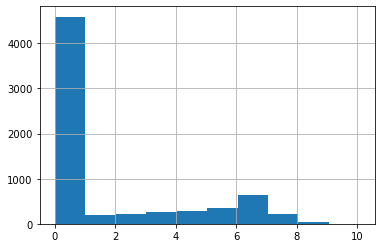

In [130]:
a = np.log(X_train["ShoppingMall"] + 1)
a.hist()

In [7]:
# X_train.info()
cat_cols = X_train.select_dtypes(include=["object"]).columns
num_cols = X_train.select_dtypes(exclude=["object"]).columns
print(cat_cols)
print(num_cols)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')
Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')


In [132]:
si = SimpleImputer(strategy="most_frequent")
ki = KNNImputer(n_neighbors=7)

X_train[cat_cols] = si.fit_transform(X_train[cat_cols])
X_train[num_cols] = ki.fit_transform(X_train[num_cols])

In [133]:
X_train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [134]:
X_train[num_cols] = StandardScaler().fit_transform(X_train[num_cols])

In [135]:
print(min(X_train["FoodCourt"]))
print(max(X_train["FoodCourt"]))

-0.28978045317460327
17.468247149756866


In [136]:
X_train[cat_cols].describe()
print(cat_cols)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')


In [137]:
X_train.drop(columns=["Cabin", "PassengerId", "Name"], inplace=True)

In [138]:
print(X_train.shape)

(6954, 10)


In [139]:
ohe_cols = [x for x in cat_cols if x not in ("Cabin", "Name", "PassengerId")]
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

ct = ColumnTransformer([
    ("nums", "passthrough", num_cols),
    ("cat", ohe, ohe_cols)
])

X_train1 = ct.fit_transform(X_train)

In [148]:
print(X_train1.shape)

(6954, 16)


In [145]:
X_test[cat_cols] = si.fit_transform(X_test[cat_cols])
X_test[num_cols] = ki.fit_transform(X_test[num_cols])

X_test[num_cols] = StandardScaler().fit_transform(X_test[num_cols])

X_test.drop(columns=["Cabin", "PassengerId", "Name"], inplace=True)

X_test1 = ct.fit_transform(X_test)

In [147]:
print(X_test1.shape)

(1739, 16)


In [172]:
plot_pd = pd.DataFrame(X_train1)
for i in plot_pd.columns:
    plt.hist(X_train1[i])
    plt.show()
    print(i)

In [170]:
y_train = np.where(y_train == False, 0, 1)
y_test = np.where(y_test == False, 0, 1)

In [184]:
p1 = Perceptron(random_state=42)

In [189]:
p1.fit(X_train1, y_train)
y_pred1 = p1.predict(X_test1)

In [190]:
print(p1.score(X_train1, y_train))
print(accuracy_score(y_test, y_pred1))

0.6931262582686224
0.6975273145485912


In [187]:
p2 = Perceptron(penalty="l2", alpha=0.001, max_iter=3000)

In [191]:
p2.fit(X_train1, y_train)
y_pred2 = p2.predict(X_test1)

In [192]:
print(p2.score(X_train1, y_train))
print(accuracy_score(y_test, y_pred2))

0.6988783433994823
0.6969522714203565


In [194]:
sgd1 = SGDClassifier(random_state=42)

In [195]:
sgd1.fit(X_train1, y_train)
y_pred3 = sgd1.predict(X_test1)

In [197]:
print(sgd1.score(X_train1, y_train))
print(accuracy_score(y_test, y_pred3))

0.7660339373022721
0.7619321449108684


In [200]:
km = KMeans(n_clusters=4, random_state=42)

In [205]:
km_reg = km.fit(X_train1, y_train)

X_train2 = pd.DataFrame(X_train1)
X_train2["cluster_label"] = km_reg.labels_

y_pred4 = km.predict(X_test1)

X_test2 = pd.DataFrame(X_test1)
X_test2["cluster_label"] = y_pred4

In [208]:
X_train2["cluster_label"].value_counts()

0    3939
1    2285
3     446
2     284
Name: cluster_label, dtype: int64

In [209]:
X_test2["cluster_label"].value_counts()

0    951
1    588
3    105
2     95
Name: cluster_label, dtype: int64

In [215]:
gbc = GradientBoostingClassifier(random_state=42, n_estimators =500, learning_rate = 0.01, max_depth=5)

gbc.fit(X_train1, y_train)
y_pred5 = gbc.predict(X_test1)

In [217]:
print(gbc.score(X_train1, y_train))
print(accuracy_score(y_test, y_pred5))

0.8232671843543284
0.7780333525014376


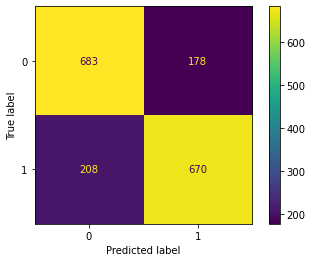

In [220]:
cm = confusion_matrix(y_test, y_pred5)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1]).plot()

In [226]:
y_pred5_prob = gbc.predict_proba(X_test1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred5)
auc_roc = auc(fpr, tpr)

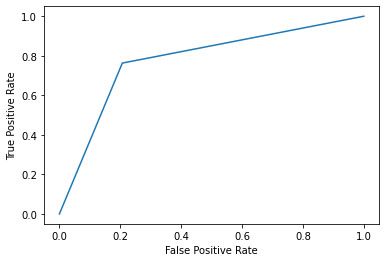

In [228]:
RocCurveDisplay(fpr = fpr, tpr = tpr).plot()